# Product Recommendation with Contextual RL
> Contextual bandit based recommendation system modeling, and Dash app to simulate the contextual bandit environment

- toc: true
- badges: false
- comments: true
- categories: [RL, ContextualBandit, MAB, Context]
- image:

## Introduction

Duration: 5

Contextual bandits have become a popular approach to recommender problems, where there are many possible items to offer and there is frequent interaction with the users, e.g. via click/no-click or purchase/no-purchase events. The key idea is that improvement of the recommender policy is achieved in a trial-and-error fashion by taking user features into account. In general, bandit algorithms can be thought of as “online self-improving A/B testing”. A somewhat cartoonish way of comparison of the usual A/B testing, standard multi-armed bandit approach (online improvement not taking individual user features into account) and contextual bandit approach (online improvement taking individual user features into account) could be viewed as follows.

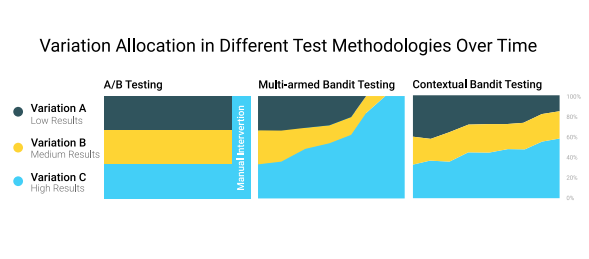

Common applications of contextual bandit algorithms include, among others, news recommendation and website/ad personalization.

### What you'll learn?

- Contextual bandit based recommendation system modeling
- Dash app to simulate the contextual bandit environment

### Why is this important?

1. Context plays an important role in building good recommender systems
2. Reinforcement learning is capable of adapting the changing environment quickly which is crucial for the success of recommender systems

### How it will work?

1. Create the baseline contextual RL agent
2. Modify the context and re-train the contextual RL agent

### Who is this for?

- People who are new in reinforcement and contextual recommendations
- People looking to get a practical sense on contextual RL based recommendations

### Important resources

- [Notebook - Simulating a news personalization scenario using Contextual Bandits](https://nb.recohut.com/reinforcement/contextual/2021/04/22/vowpal-wabbit-contextual-recommender.html)
- [Notebook - Contextual bandit with changing context](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context.ipynb)
- [Notebook - Contextual bandit with changing context part 2](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context-part2.ipynb)
- [Notebook - Dash app](https://nbviewer.jupyter.org/github/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-contextual-bandit-dash-app.ipynb)

<!---------------------------->

## Baseline model

Duration: 10

Refer to [this](https://nb.recohut.com/reinforcement/contextual/2021/04/22/vowpal-wabbit-contextual-recommender.html) notebook for the detailed guidelines on baseline model.

### Setting the initial context

We have 3 users and 6 items. Context 1 is time of day - morning and evening. Context 2 is season - summer and winter.

Ground truth rules:

1. User 1 likes Item 1 in morning, and Item 6 in summer
2. User 2 likes Item 2 in winter, and Item 5 in summer morning
3. User 3 likes Item 2 in morning, Item 3 in evening, and item 4 in winter morning

```python
users = ['A','B','C']
items = ['Item1','Item2','Item3','Item4','Item5','Item6']
context1 = ['morning','evening']
context2 = ['summer','winter']

context = pd.DataFrame(list(product(users, context1, context2, items)), columns=['users', 'context1', 'context2', 'items'])
context['reward'] = 0

#user 1 likes Item 1 in morning, and Item 6 in summer
context.loc[(context.users=='A') & \
            (context.context1=='morning') & \
            (context['items']=='Item1'), \
            'reward'] = 1
context.loc[(context.users=='A') & \
            (context.context2=='summer') & \
            (context['items']=='Item6'), \
            'reward'] = 1

#user 2 likes Item 2 in winter, and Item 5 in summer morning
context.loc[(context.users=='B') & \
            (context.context2=='winter') & \
            (context['items']=='Item2'), \
            'reward'] = 1
context.loc[(context.users=='B') & \
            (context.context1=='morning') & \
            (context.context2=='summer') & \
            (context['items']=='Item5'), \
            'reward'] = 1

#user 3 likes Item 2 in morning, Item 3 in evening, and item 4 in winter morning
context.loc[(context.users=='C') & \
            (context.context1=='morning') & \
            (context['items']=='Item2'), \
            'reward'] = 1
context.loc[(context.users=='C') & \
            (context.context1=='evening') & \
            (context['items']=='Item3'), \
            'reward'] = 1
context.loc[(context.users=='C') & \
            (context.context1=='morning') & \
            (context.context2=='winter') & \
            (context['items']=='Item4'), \
            'reward'] = 1
```

### Running simulation

```python
# Instantiate learner in VW
vw = pyvw.vw("--cb_explore_adf -q UA --quiet --epsilon 0.2")

num_iterations = 5000
ctr = run_simulation(vw, num_iterations, users, context1, context2, items, get_cost)

plot_ctr(num_iterations, ctr)
```



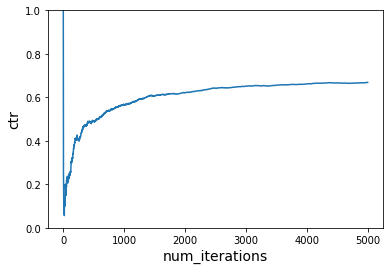

```python
# Instantiate learner in VW but without -q
vw = pyvw.vw("--cb_explore_adf --quiet --epsilon 0.2")

num_iterations = 5000
ctr = run_simulation(vw, num_iterations, users, context1, context2, items, get_cost)

plot_ctr(num_iterations, ctr)
```



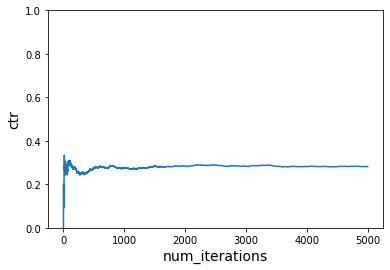

```python
# Instantiate learner in VW
vw = pyvw.vw("--cb_explore_adf -q UA --quiet --epsilon 0.2")

num_iterations = 5000
ctr = run_simulation(vw, num_iterations, users, context1, context2, items, get_cost, do_learn=False)

plot_ctr(num_iterations, ctr)
```



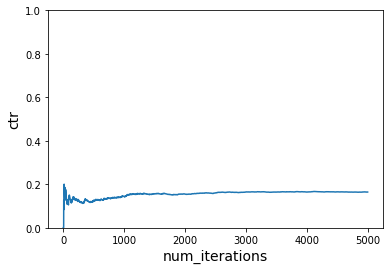

<!---------------------------->

## Change the context

Duration: 10

Refer to [this](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context.ipynb) and [this](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context-part2.ipynb) notebook.

Updated ground truth rules:

1. User 1 likes Item 2 in morning, and Item 5 in summer
2. User 2 likes Item 2 in summer, and Item 5 in morning
3. User 3 likes Item 4 in morning, Item 3 in evening, and item 4 in winter evening

### Running simulation

We are using the first reward function initially and then switch to second reward function

```python
vw = pyvw.vw("--cb_explore_adf -q UA --quiet --epsilon 0.2")

num_iterations_per_cost_func = 5000
cost_functions = [get_cost, get_cost_new1]
total_iterations = num_iterations_per_cost_func * len(cost_functions)

ctr = run_simulation_multiple_cost_functions(vw, num_iterations_per_cost_func, users, context1, context2, items, cost_functions)

plot_ctr(total_iterations, ctr)
```



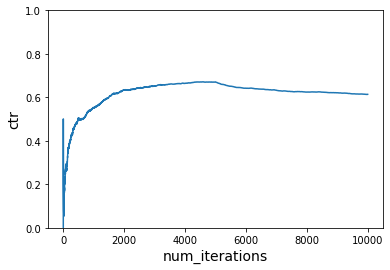

```python
vw = pyvw.vw("--cb_explore_adf -q UA --quiet --epsilon 0.2")

num_iterations_per_cost_func = 5000
cost_functions = [get_cost, get_cost_new1]
total_iterations = num_iterations_per_cost_func * len(cost_functions)

ctr = run_simulation_multiple_cost_functions(vw, num_iterations_per_cost_func, users, context1, context2, items, cost_functions, do_learn=False)
plot_ctr(total_iterations, ctr)
```



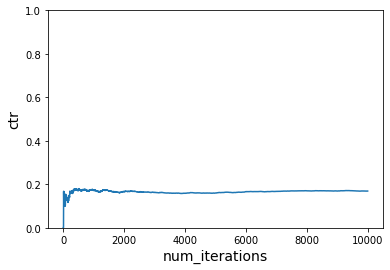

## Create the dash app

Duration: 10

Refer to [this](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-contextual-bandit-dash-app.ipynb) notebook.

The objective of this app is to apply the contextual bandit algorithms to recommendation problem under a simulated environment. The recommender agent is able to quickly adapt the changing behavior of users and change the recommendation strategy accordingly.

There are 3 users: Alex, Ben and Cindy. There are 6 news topics and 2 types of context. That means, Alex, Ben, and Cindy might prefer to read news reated to any of the 6 topics on morning/evening and weekday/weekends. Eg. Alex might prefer business related news on weekday mornings and entertainment related news on weekend evenings. And it is also possible that in future, Alex starts reading politics on weekday mornings. These situations reflect the real-world scenarios and the job of our contextual agent is to automatically detect these preferences and changes and recommend the items accordingly to maximize the reward like user satisfaction.

[https://www.youtube.com/watch?v=9t0-FZIWMRQ](https://www.youtube.com/watch?v=9t0-FZIWMRQ)

In the example, agent initialized with random preferences and starts recommending news to the users. We added 2 context: "Cindy prefers economy news on weekday mornings" and "Ben prefers weather news on weekday mornings" and starts rewarding agent for correctly recommending as per these preferences. At the moment, agent knows that Ben prefers business news and Cindy prefers history news. With time, agent started recommending weather news to Ben. Similar case we will see for Cindy and in fact, for all users.

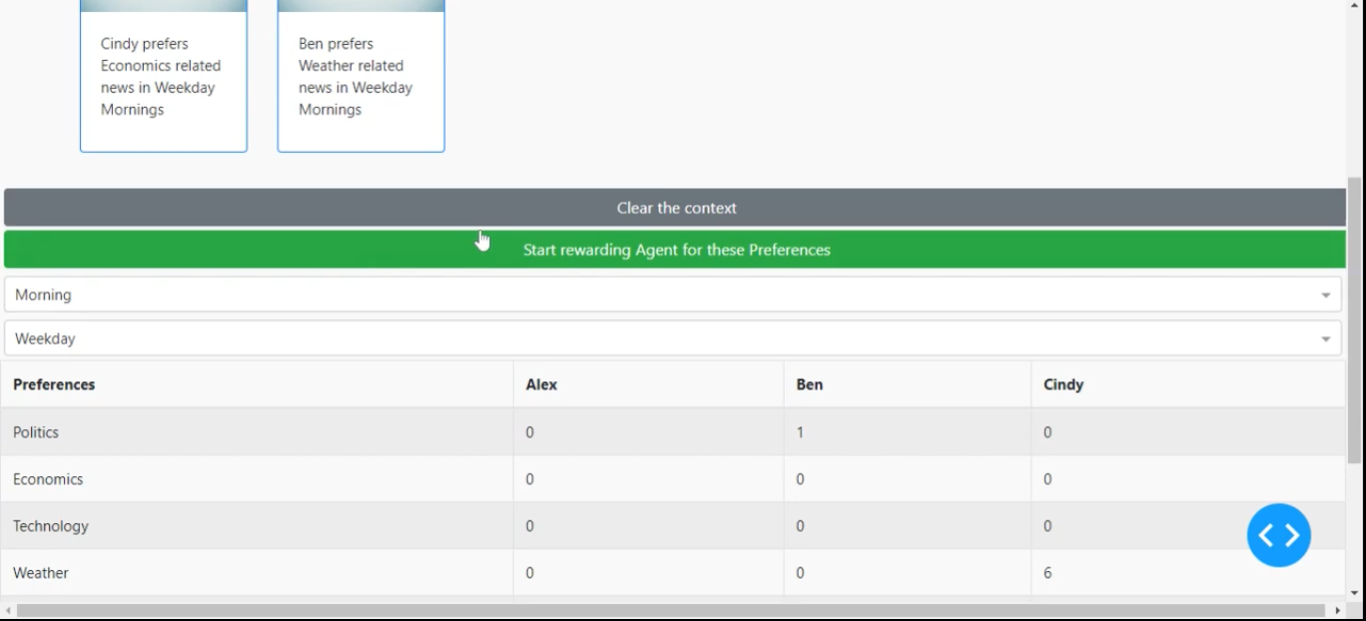

Note: Interval is 1 sec but we are not seeing updates every second because we are looking at a particular context only: Weekday mornings but agent is recommending globally.

It is important to note that agent do not know the ground truth. It just taking action and receiving reward and the objective is to estimate this ground truth preferences.

<!---------------------------->

## Conclusion

Duration: 2

Congratulations!

### What we've covered

- Contextual bandit based recommendation system modeling
- Dash app to simulate the contextual bandit environment

### Next steps

- Enhance the app by increasing the products
- Improve the app design by adding product images and changing the layout design

### Links and References

- [Notebook - Simulating a news personalization scenario using Contextual Bandits](https://nb.recohut.com/reinforcement/contextual/2021/04/22/vowpal-wabbit-contextual-recommender.html)
- [Notebook - Contextual bandit with changing context](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context.ipynb)
- [Notebook - Contextual bandit with changing context part 2](https://github.com/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-vowpalwabbit-changing-context-part2.ipynb)
- [Notebook - Dash app](https://nbviewer.jupyter.org/github/recohut-admin/reco-nb/blob/dev/_notebooks/2021-06-12-contextual-bandit-dash-app.ipynb)
- [https://engineering.nordeus.com/contextual-bandits-for-in-app-recommendation/](https://engineering.nordeus.com/contextual-bandits-for-in-app-recommendation/)